# Renewable Energy Analysis

## Overview
This notebook performs exploratory data analysis on global renewable energy datasets, including:
- Biofuel production
- Wind energy capacity and generation
- Hydropower consumption and share
- Solar energy capacity and consumption
- Geothermal capacity
- Overall renewable energy trends

## Dataset Information
All datasets are sourced from Our World in Data and contain country-level and global renewable energy statistics.

## Analysis Types
- Histogram analysis of renewable electricity share
- Line graphs comparing country trends
- Bar charts for top performers
- Scatter plots for correlation analysis
- Pie charts for energy mix breakdown

In [5]:
!pip install pandasql


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26893 sha256=08b0af1b426babcc4a42559e4f1c4b8102658cf146d91f1d9c5915963da95250
  Stored in directory: c:\users\athar\appdata\local\pip\cache\wheels\15\a1\e7\6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


  DEPRECATION: Building 'pandasql' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pandasql'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import os
from pathlib import Path

# Set up SQL query function
mysql = lambda q: sqldf(q, globals())

# Configure matplotlib settings
plt.style.use('fivethirtyeight')
%matplotlib inline

# Set data directory path (using relative path)
DATA_DIR = Path('./files')
print(f"Data directory (relative): {DATA_DIR}")
print(f"Directory exists: {DATA_DIR.exists()}")

Data directory (relative): files
Directory exists: True


In [8]:
# Load all renewable energy datasets using relative paths with pathlib for platform independence
try:
    bio_prod = pd.read_csv(DATA_DIR / 'biofuel-production.csv')
    wind_cap = pd.read_csv(DATA_DIR / 'cumulative-installed-wind-energy-capacity-gigawatts.csv')
    hydro_share_nrg = pd.read_csv(DATA_DIR / 'hydro-share-energy.csv')
    hydro_cons = pd.read_csv(DATA_DIR / 'hydropower-consumption.csv')
    geo_cap = pd.read_csv(DATA_DIR / 'installed-geothermal-capacity.csv')
    pv_cap = pd.read_csv(DATA_DIR / 'installed-solar-PV-capacity.csv')
    renew_cons = pd.read_csv(DATA_DIR / 'modern-renewable-energy-consumption.csv')
    renew_prod = pd.read_csv(DATA_DIR / 'modern-renewable-prod.csv')
    renew_share_nrg = pd.read_csv(DATA_DIR / 'renewable-share-energy.csv')
    hydro_share = pd.read_csv(DATA_DIR / 'share-electricity-hydro.csv')
    renew_share = pd.read_csv(DATA_DIR / 'share-electricity-renewables.csv')
    solar_share = pd.read_csv(DATA_DIR / 'share-electricity-solar.csv')
    wind_share = pd.read_csv(DATA_DIR / 'share-electricity-wind.csv')
    solar_cons = pd.read_csv(DATA_DIR / 'solar-energy-consumption.csv')
    solar_share_nrg = pd.read_csv(DATA_DIR / 'solar-share-energy.csv')
    wind_gen = pd.read_csv(DATA_DIR / 'wind-generation.csv')
    
    # Rename column for wind capacity if needed for consistency
    wind_cap.rename(columns={'Wind Capacity': 'capacity'}, inplace=True)
    
    print("✓ All datasets loaded successfully using relative paths!")
    print(f"\nDataset shapes:")
    print(f"  - Wind Capacity: {wind_cap.shape}")
    print(f"  - Solar Consumption: {solar_cons.shape}")
    print(f"  - Renewable Share: {renew_share.shape}")
    print(f"  - PV Capacity: {pv_cap.shape}")
    
except FileNotFoundError as e:
    print(f"Error: Could not find data file. Please ensure CSV files are in the relative path '{DATA_DIR}'.")
    print(f"Missing file: {e}")
except Exception as e:
    print(f"Error loading data: {e}")

✓ All datasets loaded successfully using relative paths!

Dataset shapes:
  - Wind Capacity: (1403, 4)
  - Solar Consumption: (7995, 4)
  - Renewable Share: (6374, 4)
  - PV Capacity: (1520, 4)


## Analysis Objectives

This notebook will perform comprehensive exploratory data analysis on renewable energy datasets using various visualization techniques.

### Visualization Types

We will create the following types of visualizations:
- **Histogram**: Distribution of renewable electricity share across countries
- **Line Graph**: Temporal trends comparing countries
- **Bar Chart**: Top performing countries
- **Scatter Plot**: Correlation analysis between energy sources
- **Pie Chart**: Energy mix breakdown












## 1. Histogram Analysis

### 1.1 Renewable Electricity Share Distribution (2020)

We'll analyze the distribution of renewable electricity share across countries in 2020. The dataset includes aggregate records for continents and the world, which we'll filter out to focus on country-level data.

In [9]:
renew_2020 = mysql("""
SELECT
    Entity,
    Code,
    "Renewables (% electricity)" AS Share
FROM renew_share
WHERE
    Year = 2020
AND
    Code IS NOT NULL
AND
    Code <> 'OWID_WRL'
""")

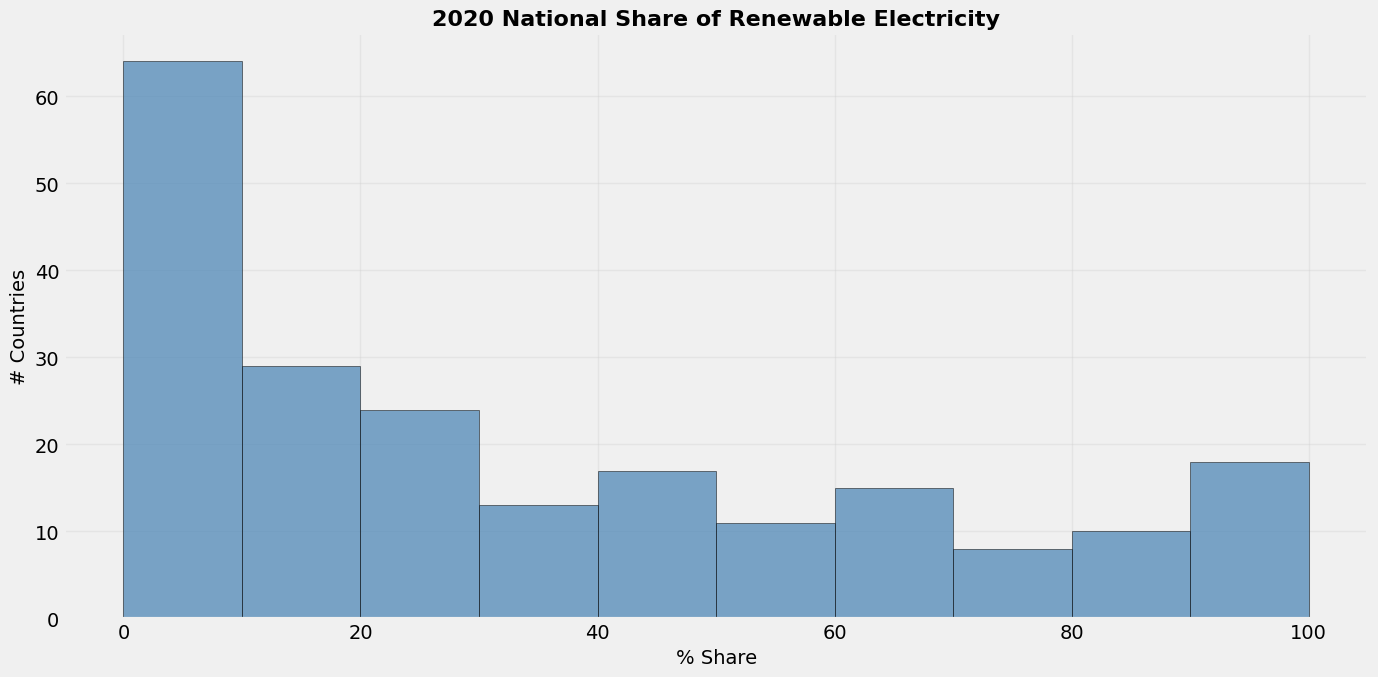

In [10]:
# Create histogram
fig, ax = plt.subplots(figsize=(14, 7))
ax.hist(renew_2020['Share'], bins=10, edgecolor='black', color='steelblue', alpha=0.7)
ax.set_title("2020 National Share of Renewable Electricity", fontsize=16, fontweight='bold')
ax.set_xlabel("% Share", fontsize=14)
ax.set_ylabel("# Countries", fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1.2 Analysis of High Renewable Share Countries

The histogram reveals an interesting pattern: most countries have low renewable electricity share, but there's a notable uptick in the 90-100% bin. This suggests that once countries reach a critical threshold (around 80-90%), they often push to near-complete renewable electricity generation.

Let's identify which countries are in the 90-100% renewable electricity share category.

In [11]:
# Find countries with 90%+ renewable electricity share
high_renewable = mysql("""
SELECT
    Entity,
    Code,
    "Renewables (% electricity)" AS Share
FROM renew_share
WHERE
    Year = 2020
AND
    "Renewables (% electricity)" >= 90
ORDER BY "Renewables (% electricity)" DESC
""")

print(f"Countries with ≥90% renewable electricity share: {len(high_renewable)}")
display(high_renewable)

Countries with ≥90% renewable electricity share: 18


,Entity,Code,Share
0,Albania,ALB,100.000
1,Bhutan,BTN,100.000
2,Central African Republic,CAF,100.000
3,Iceland,ISL,100.000
4,Lesotho,LSO,100.000
5,Nepal,NPL,100.000
6,Paraguay,PRY,100.000
7,Ethiopia,ETH,99.929
8,Democratic Republic of Congo,COD,99.676
9,Costa Rica,CRI,98.799


**Key Observations:**
- The list includes a diverse mix of small and large, wealthy and developing countries
- Small countries with abundant renewable resources (e.g., hydro, geothermal) can achieve high renewable shares more easily
- Examples:
  - **Hydroelectric**: Albania, Central African Republic, Ethiopia, Bhutan
  - **Geothermal**: Iceland
  - **Mixed sources**: Costa Rica (hydro, geothermal, wind, biomass)
- Larger countries face greater challenges due to scale and need for diverse energy sources

## 2. Line Graph Analysis

### 2.1 USA vs China Wind Capacity Comparison

Comparing the historical growth of installed wind capacity between the two largest economies.

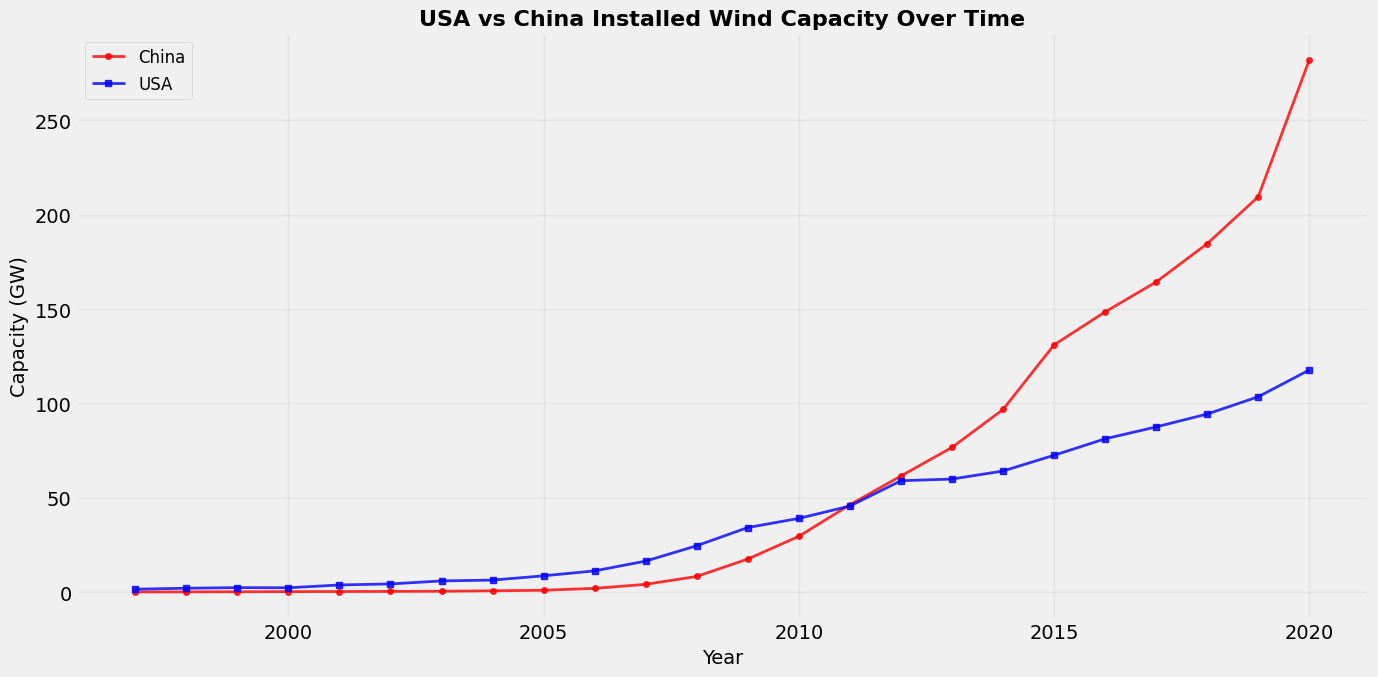

In [12]:
# Filter data for USA and China
usa = wind_cap[wind_cap.Entity == 'United States'].copy()
chn = wind_cap[wind_cap.Entity == 'China'].copy()

# Create comparison plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(chn.Year, chn.capacity, label='China', color='red', linewidth=2, alpha=0.8, marker='o', markersize=4)
ax.plot(usa.Year, usa.capacity, label='USA', color='blue', linewidth=2, alpha=0.8, marker='s', markersize=4)
ax.set_title('USA vs China Installed Wind Capacity Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Capacity (GW)", fontsize=14)
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Key Findings:**
- USA had higher wind capacity until ~2010
- China overtook USA around 2011 and maintained rapid growth
- USA showed more linear, steady growth pattern

### 2.2 China:USA Wind Capacity Ratio Over Time

Let's examine the relative growth rate by calculating the ratio of China to USA capacity.

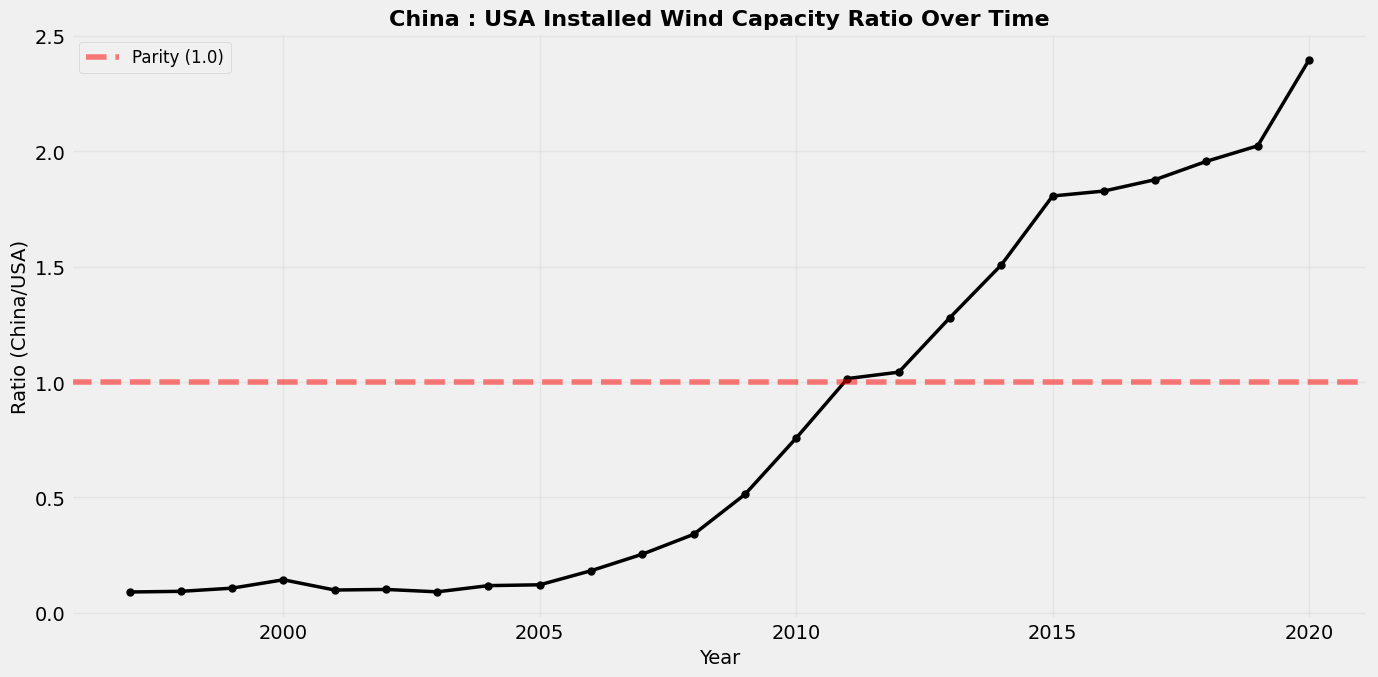

Latest ratio (2020): 2.39


In [13]:
# Merge USA and China data and calculate ratio
combo = pd.merge(usa, chn, on='Year', suffixes=('_usa', '_chn'))
combo['ratio'] = combo['capacity_chn'] / combo['capacity_usa']

# Plot ratio over time
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(combo.Year, combo.ratio, color='black', linewidth=2.5, marker='o', markersize=5)
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Parity (1.0)')
ax.set_title('China : USA Installed Wind Capacity Ratio Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Ratio (China/USA)", fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Latest ratio (2020): {combo[combo.Year == 2020]['ratio'].values[0]:.2f}")

**Key Insights:**
- China's rapid growth acceleration began around 2008
- Parity (ratio = 1.0) was reached around 2011
- By 2020, China had approximately 2.5x the USA's wind capacity
- The ratio shows sustained upward trajectory, indicating China's continued investment in wind energy

## 3. Bar Chart Analysis

### 3.1 Top 10 Countries by Solar Energy Consumption (2020)

Identifying the leading countries in solar electricity consumption using pandas filtering.

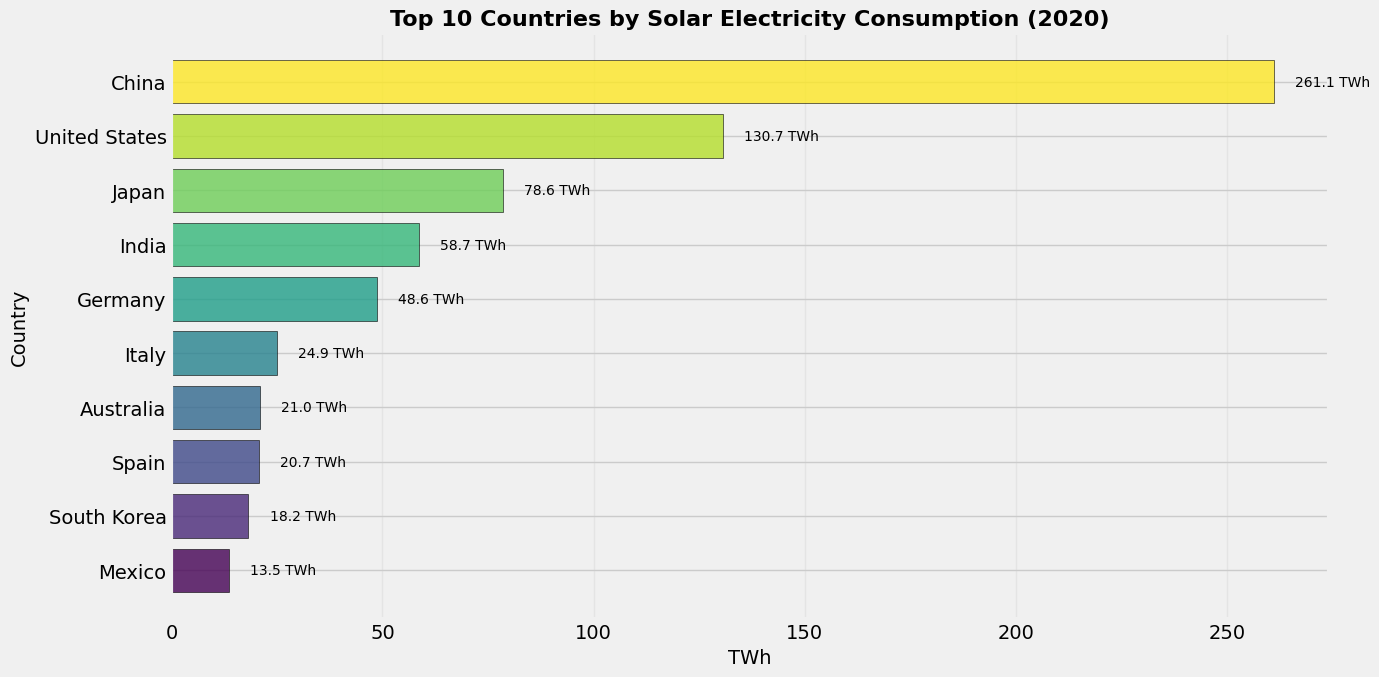

In [14]:
# Filter 2020 solar consumption data for countries only
sc2020 = solar_cons[
    (solar_cons.Year == 2020) & 
    (solar_cons.Entity != "World") & 
    (solar_cons.Code.notnull())
].copy()
sc2020 = sc2020.rename(columns={"Electricity from solar (TWh)": "TWh"})

# Get top 10 countries
top10 = sc2020.nlargest(10, 'TWh').sort_values('TWh')

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(top10)))
bars = ax.barh(top10.Entity, top10.TWh, color=colors, edgecolor='black', alpha=0.8)
ax.set_title('Top 10 Countries by Solar Electricity Consumption (2020)', fontsize=16, fontweight='bold')
ax.set_xlabel("TWh", fontsize=14)
ax.set_ylabel("Country", fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, row) in enumerate(top10.iterrows()):
    ax.text(row.TWh + 5, i, f'{row.TWh:.1f} TWh', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Key Observations:**
- China dominates solar electricity consumption, significantly exceeding all other countries
- There's a notable drop-off after the top 6 countries
- The top 10 includes a mix of developed and developing economies

## 4. Scatter Plot Analysis

### 4.1 Wind vs Solar PV Capacity Correlation (2020)

**Hypothesis:** Countries investing in renewable energy tend to develop both wind and solar PV capacity simultaneously, suggesting a positive correlation between the two.

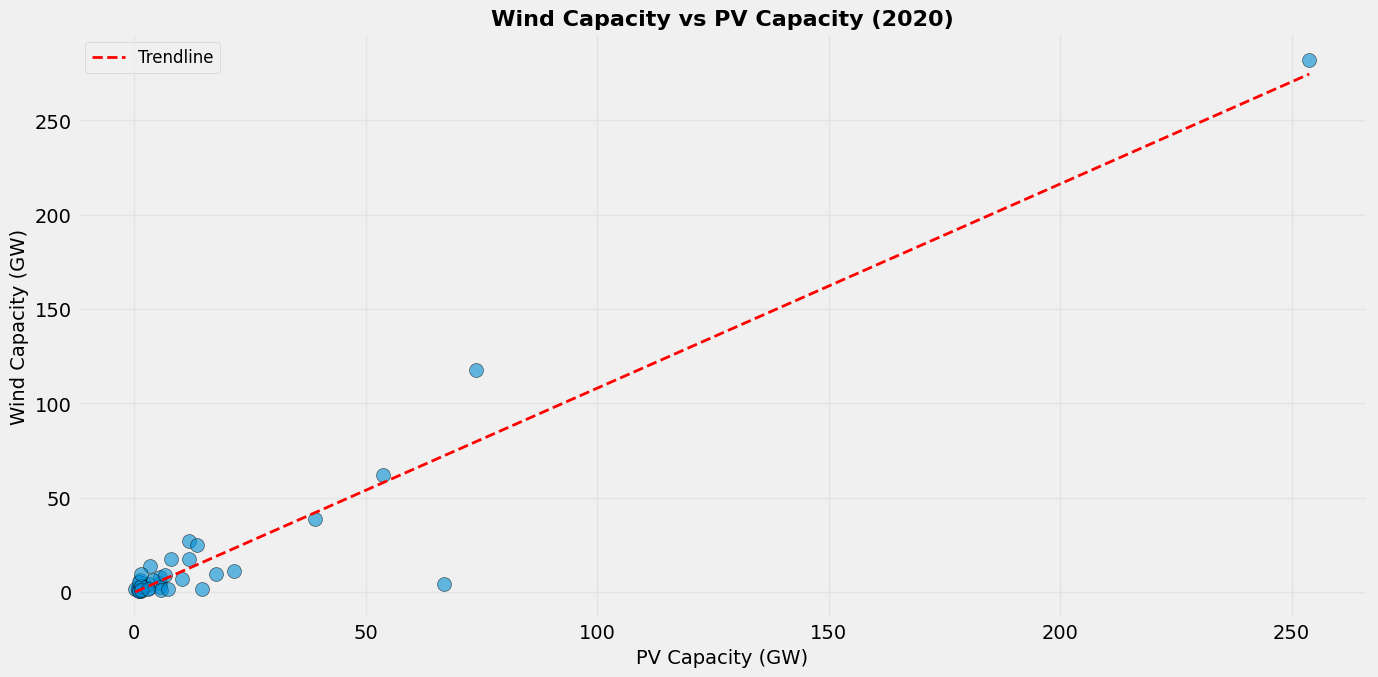

Correlation coefficient: 0.9572
Trendline equation: y = 1.082553x + -0.263333


In [15]:
# Filter 2020 data for countries only
wc2020 = wind_cap[
    (wind_cap.Year == 2020) & 
    (wind_cap.Entity != "World") & 
    (wind_cap.Code.notnull())
].copy()

pv2020 = pv_cap[
    (pv_cap.Year == 2020) & 
    (pv_cap.Entity != "World") & 
    (pv_cap.Code.notnull())
].copy()

# Merge dataframes
wcpv = pd.merge(wc2020[['Code', 'Entity', 'capacity']], 
                pv2020[['Code', 'Solar Capacity']], 
                on='Code', 
                how='inner')
wcpv = wcpv.rename(columns={"Solar Capacity": "pvcap"})

# Calculate correlation
correlation = wcpv['pvcap'].corr(wcpv['capacity'])

# Create scatter plot with trendline
fig, ax = plt.subplots(figsize=(14, 7))
ax.scatter(wcpv.pvcap, wcpv.capacity, alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

# Add trendline
z = np.polyfit(wcpv.pvcap, wcpv.capacity, 1)
p = np.poly1d(z)
x_trend = np.linspace(wcpv.pvcap.min(), wcpv.pvcap.max(), 100)
ax.plot(x_trend, p(x_trend), linewidth=2, color='red', linestyle='--', label='Trendline')

ax.set_title('Wind Capacity vs PV Capacity (2020)', fontsize=16, fontweight='bold')
ax.set_xlabel("PV Capacity (GW)", fontsize=14)
ax.set_ylabel("Wind Capacity (GW)", fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient: {correlation:.4f}")
print(f"Trendline equation: y = {z[0]:.6f}x + {z[1]:.6f}")

**Findings:**
- Positive correlation confirmed (slope ≈ 1.08)
- Suggests countries tend to install approximately 1 GW of wind capacity for every 1 GW of PV capacity
- China appears as a significant outlier, making it difficult to see patterns in other countries

### 4.2 Wind vs PV Capacity (Excluding China)

Replotting without China to better visualize patterns in other countries.

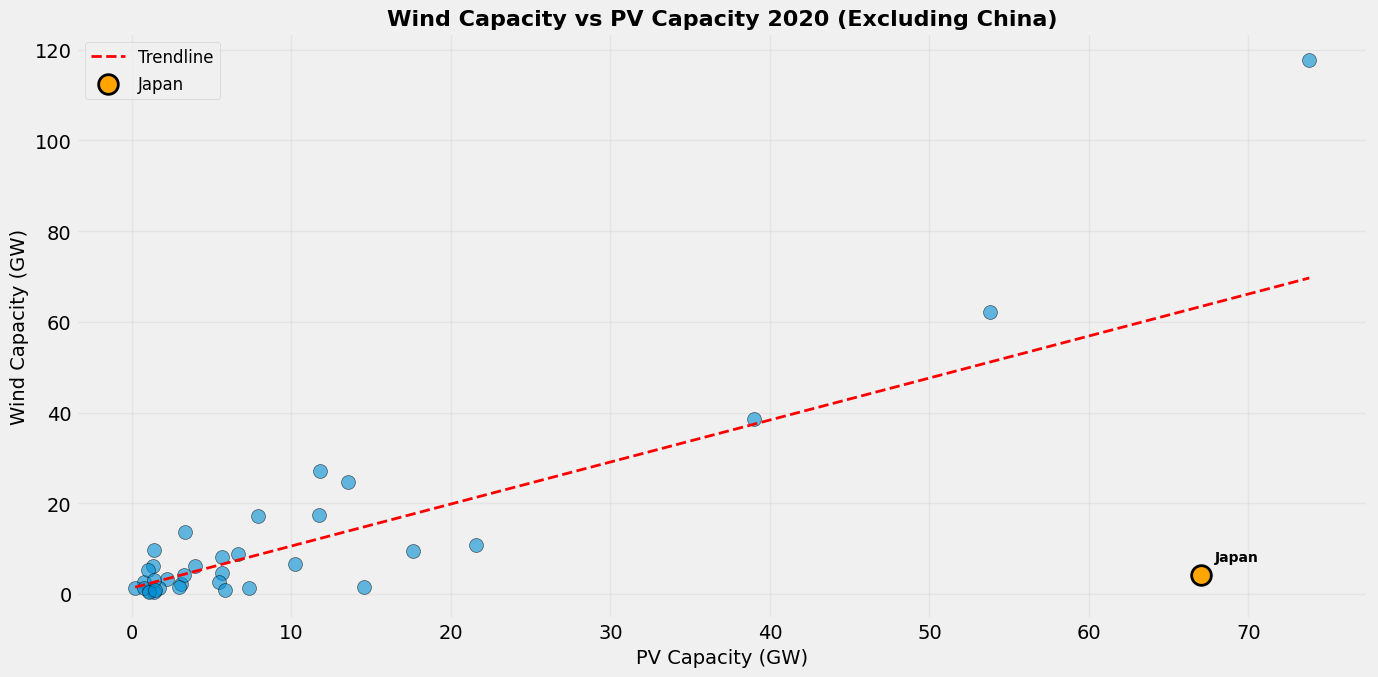

Correlation coefficient (without China): 0.7651
Trendline equation: y = 0.926079x + 1.317177


In [16]:
# Filter out China
wcpv2 = wcpv[wcpv.Code != 'CHN'].copy()

# Calculate correlation without China
correlation_no_china = wcpv2['pvcap'].corr(wcpv2['capacity'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.scatter(wcpv2.pvcap, wcpv2.capacity, alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

# Add trendline
z2 = np.polyfit(wcpv2.pvcap, wcpv2.capacity, 1)
p2 = np.poly1d(z2)
x_trend2 = np.linspace(wcpv2.pvcap.min(), wcpv2.pvcap.max(), 100)
ax.plot(x_trend2, p2(x_trend2), linewidth=2, color='red', linestyle='--', label='Trendline')

# Highlight Japan (known outlier)
japan = wcpv2[wcpv2.Code == 'JPN']
if not japan.empty:
    ax.scatter(japan.pvcap, japan.capacity, color='orange', s=200, 
               edgecolors='black', linewidth=2, label='Japan', zorder=5)
    ax.annotate('Japan', (japan.pvcap.values[0], japan.capacity.values[0]),
                xytext=(10, 10), textcoords='offset points', fontsize=10, fontweight='bold')

ax.set_title('Wind Capacity vs PV Capacity 2020 (Excluding China)', fontsize=16, fontweight='bold')
ax.set_xlabel("PV Capacity (GW)", fontsize=14)
ax.set_ylabel("Wind Capacity (GW)", fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient (without China): {correlation_no_china:.4f}")
print(f"Trendline equation: y = {z2[0]:.6f}x + {z2[1]:.6f}")

**Key Insights:**
- Positive correlation persists (slope ≈ 0.93), confirming the 1:1 relationship pattern
- **Japan** is a notable outlier with high PV but relatively low wind capacity
- **Context**: Following the 2011 Fukushima disaster, Japan prioritized rapid PV deployment
  - PV advantages: easier deployment, rooftop/distributed systems, faster implementation
  - Wind challenges: site-specific, longer lead times, requires larger scale for economics
- **Future outlook**: Japan targets 45 GW wind capacity by 2040, focusing on offshore wind
- The correlation suggests countries generally develop both technologies in parallel

## 5. Pie Chart Analysis

### 5.1 Global Renewable Energy Mix (2020)

Analyzing the worldwide breakdown of renewable energy sources:
- **Biomass**: Organic matter energy
- **Hydro**: Hydropower
- **Geothermal**: Earth's heat energy
- **Solar**: Solar photovoltaic and thermal
- **Wind**: Wind power

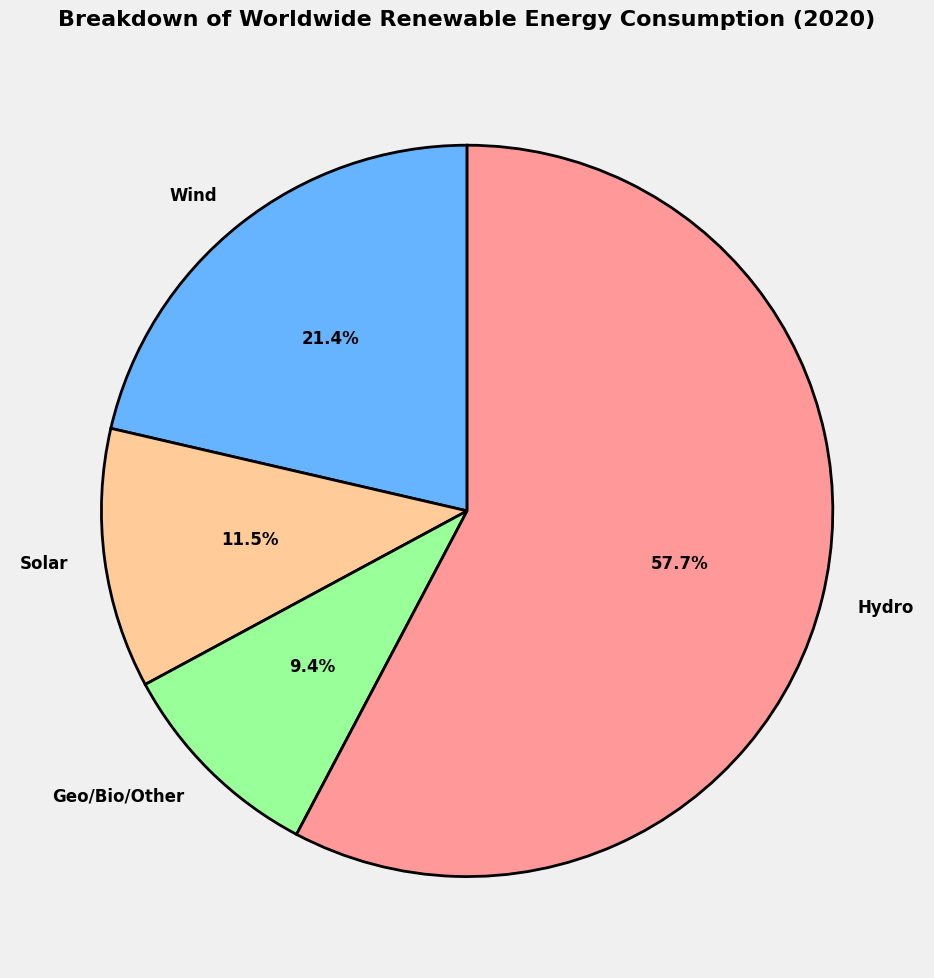


Renewable Energy Mix Summary (2020):
  Wind: 1591.21 TWh (21.4%)
  Solar: 855.72 TWh (11.5%)
  Geo/Bio/Other: 700.07 TWh (9.4%)
  Hydro: 4296.80 TWh (57.7%)


In [17]:
# Filter 2020 world renewable consumption data
world = renew_cons[(renew_cons.Year == 2020) & (renew_cons.Entity == 'World')].copy()

# Extract consumption values (assuming standard column order)
# Adjust column names based on actual dataset structure
consumption_cols = [col for col in world.columns if col not in ['Entity', 'Code', 'Year']]
world_values = world[consumption_cols].iloc[0].values

# Create labels (adjust based on actual column names)
labels = ['Wind', 'Solar', 'Geo/Bio/Other', 'Hydro']
colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff9999']

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(world_values, labels=labels, autopct='%1.1f%%', 
                                   colors=colors, startangle=90,
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 2},
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})

ax.set_title('Breakdown of Worldwide Renewable Energy Consumption (2020)', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nRenewable Energy Mix Summary (2020):")
for i, (label, value) in enumerate(zip(labels, world_values)):
    pct = (value / world_values.sum()) * 100
    print(f"  {label}: {value:.2f} TWh ({pct:.1f}%)")

**Global Renewable Energy Mix (2020):**
- **Hydropower**: Largest renewable energy source globally
- **Wind**: Second largest, showing strong growth
- **Solar**: Third largest, with rapid expansion
- **Geothermal/Biomass/Other**: Smaller but important contributions

This mix reflects both historical development (hydro's long history) and recent growth in wind and solar technologies.

## Summary & Conclusions

### Key Findings

1. **Renewable Electricity Distribution**: Most countries have low renewable electricity share, but there's a notable cluster of countries achieving 90-100% renewable electricity, often through abundant natural resources (hydro, geothermal).

2. **Country Comparisons**: 
   - China has dramatically accelerated wind capacity growth since 2008, now having ~2.5x USA's capacity
   - China also dominates solar electricity consumption globally

3. **Technology Correlation**: Strong positive correlation (≈1:1) between wind and solar PV capacity, suggesting countries develop both technologies in parallel. Notable exceptions include Japan (high PV, lower wind).

4. **Global Energy Mix**: Hydropower remains the largest renewable source globally, followed by wind and solar, with rapid growth in the latter two.

### Data Sources
- All datasets from Our World in Data
- Analysis year: 2020 (latest available in datasets)
- Geographic scope: Country-level and global aggregates

### Future Analysis Opportunities
- Time series forecasting of renewable energy growth
- Correlation with GDP, population, and policy factors
- Regional analysis (continents, economic blocs)
- Technology cost trends and adoption rates